In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
data = pd.read_csv('crime_data.csv')
data.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
data.head()
states = data.State

In [139]:
print(data.shape)
print('\n')

print(data.describe())
print('\n')

print(data.dtypes)

(50, 5)


         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


State        object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object


In [140]:
data.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [141]:
data = data.iloc[:, 1:]
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


<AxesSubplot:>

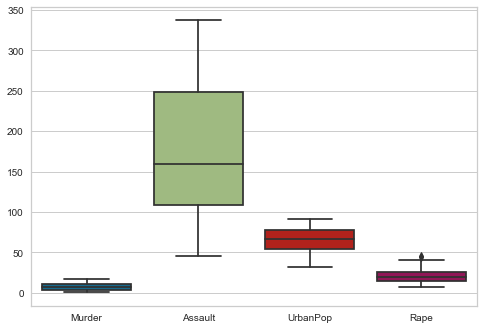

In [142]:
sns.boxplot(data=data)

In [143]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_n = scaler.fit_transform(data)

In [144]:
data_n = pd.DataFrame(data_n)
data_n = data_n.rename(columns={0:'Murder', 1:'Assault', 2:'UrbanPop', 3:'Rape'})
data_n.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


<AxesSubplot:>

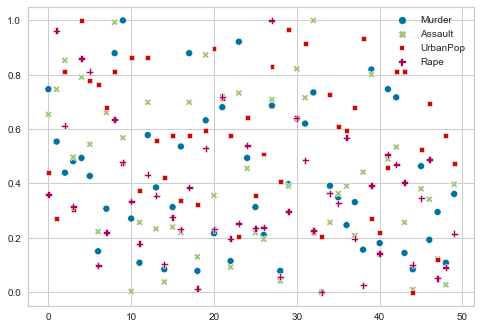

In [145]:
sns.scatterplot(data=data_n)

# Elbow Method

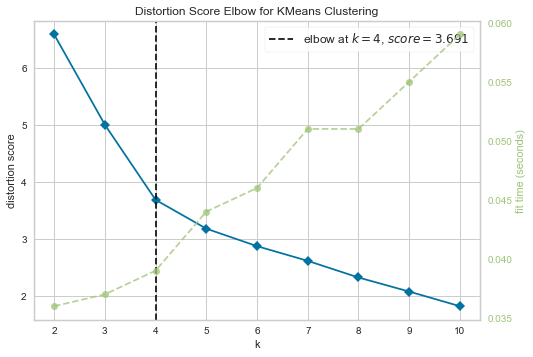

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [146]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,11), timings= True)
visualizer.fit(data_n)        # Fit data to visualizer
visualizer.show()




### Taking 4 as cluster value

In [147]:
model = KMeans(n_clusters = 4, max_iter=5, random_state=1)
data_labels = model.fit_predict(data_n)

model.labels_

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       3, 0, 2, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 3, 1])

In [148]:
data['Cluster_lables'] = model.labels_

In [153]:
data['States'] = states

In [155]:
data.head(4)

,Murder,Assault,UrbanPop,Rape,Cluster_lables,States
0,13.2,236,58,21.2,0,Alabama
1,10.0,263,48,44.5,2,Alaska
2,8.1,294,80,31.0,2,Arizona
3,8.8,190,50,19.5,0,Arkansas


C:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


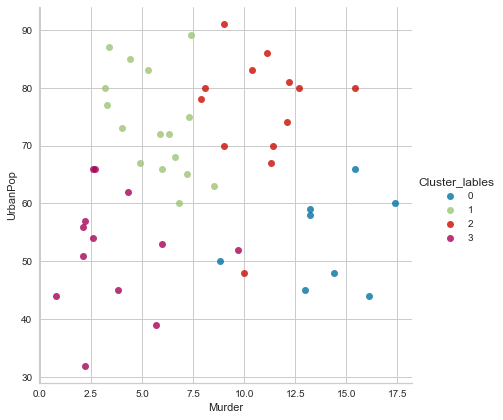

In [150]:
sns.lmplot( 'Murder','UrbanPop',  data=data,hue = 'Cluster_lables', fit_reg=False, size = 6 )
plt.show()

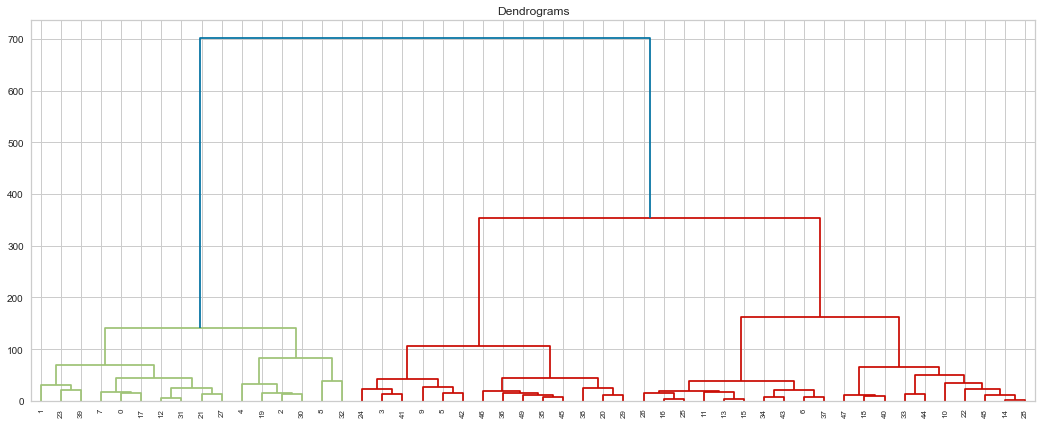

In [151]:
## M

import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(18, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))


# DB Scan

In [156]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=2, min_samples=5)
dbscan.fit(data_n)

DBSCAN(eps=2)

In [157]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)